### Notebook to play around with CycIF data

In [10]:
# Import librarires
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt

# Create anndata and scanpy
import anndata as ad
import scanpy as sc

# Import custom functions
import wget

In [12]:
# Import data
# Laptop
#WD = "/Users/aj/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma"
# HMS
WD = "C:/Users/ajn16/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma"

os.chdir(WD)
x = pd.read_csv('Trial_data.csv', delimiter=',', index_col=0)
# Look at data
x.head()

,DAPI,CD2,TCR,CD4,DAPI.1,CD3D,CD7,CD43,DAPI.2,ALK,CD45,CD10,DAPI.3,Ki67,CD5,CD11b,DAPI.4,FOXP3,CD8,CD57
C1,2356,115,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C2,3396,0,0,0,3656,0,14,4,3195,0,10,0,3983,27,0,76,4140,9,34,0
C3,6740,13,0,0,7914,13,0,7,5810,0,6,0,7060,5,0,0,8117,9,0,0
C4,5002,2,0,0,6041,0,0,0,6421,0,5,0,5410,0,0,0,6553,0,0,0
C5,5457,0,0,0,6905,0,0,0,7927,0,0,0,6053,0,0,0,7058,0,0,0


In [13]:
# Remove all DAPI columns
cols = [c for c in x.columns if c[:4] != 'DAPI']
x1=x[cols]
# Add the first DAPI channel
x1 = pd.concat([x1, x[['DAPI']]], axis=1)
x1.head()

,CD2,TCR,CD4,CD3D,CD7,CD43,ALK,CD45,CD10,Ki67,CD5,CD11b,FOXP3,CD8,CD57,DAPI
C1,115,43,0,0,0,0,0,0,0,0,0,0,0,0,0,2356
C2,0,0,0,0,14,4,0,10,0,27,0,76,9,34,0,3396
C3,13,0,0,13,0,7,0,6,0,5,0,0,9,0,0,6740
C4,2,0,0,0,0,0,0,5,0,0,0,0,0,0,0,5002
C5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5457


In [31]:
# Normalisation of data
file_url = 'https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/py_scripts/mi_pp_normalize.py'
exec(open(wget.download(file_url)).read())
x1 = mi_pp_normalize(x1)
x1.head()

100% [..................................................................................] 593 / 593Applying log transformation and quantile normalization...


C:\Users\ajn16\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


,CD2,TCR,CD4,CD3D,CD7,CD43,ALK,CD45,CD10,Ki67,CD5,CD11b,FOXP3,CD8,CD57,DAPI
C1,1.575301,1.008719,0.958202,0.973786,0.976253,0.967054,0.985527,0.988584,-1.0,0.984458,0.994599,0.938175,0.995822,0.954667,-1.0,-0.687901
C2,0.983059,0.981726,0.958202,0.973786,0.392263,0.967054,0.985527,0.545427,-1.0,1.007415,0.994599,3.018036,0.391636,1.021628,-1.0,-0.209407
C3,0.724261,0.981726,0.958202,0.442310,0.976253,0.967054,0.985527,-0.353035,-1.0,0.984458,0.994599,0.938175,0.391636,0.954667,-1.0,0.566451
C4,0.983059,0.981726,0.958202,0.973786,0.976253,0.967054,0.985527,-1.000000,-1.0,0.984458,0.994599,0.938175,0.995822,0.954667,-1.0,0.245770
C5,0.983059,0.981726,0.958202,0.973786,0.976253,0.967054,0.985527,0.988584,-1.0,0.984458,0.994599,0.938175,0.995822,0.954667,-1.0,0.341858


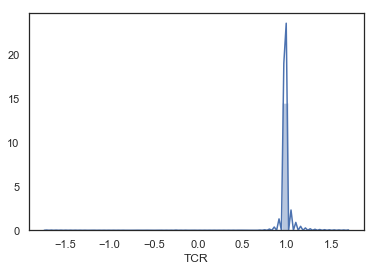

In [33]:
# Look at data distribution
sns.distplot(x1['TCR'])

In [16]:
# Create AnnData
df = x1 #enter the name of the dataframe created above

# Array of expression values
X = df.values

# Cells
obs = pd.DataFrame()
obs['cells'] = df.index

# Protein Markers
var_names = list(df)
n_vars = len(var_names)
var = pd.DataFrame(index=var_names)

# Create AnnData
adata = ad.AnnData(X, obs=obs, var=var)

### Scanpy analysis

In [18]:
X.shape
obs.shape
var.shape

(16, 0)

In [17]:
# Preprocessing
sc.pp.filter_cells(adata, min_genes=1)
sc.pp.filter_genes(adata, min_cells=0)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [18]:
adata

AnnData object with n_obs × n_vars = 3006 × 16 
    obs: 'cells', 'n_genes', 'n_counts'
    var: 'n_cells'

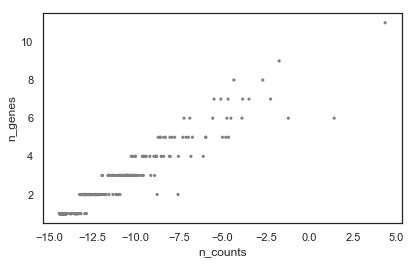

In [19]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [20]:
sc.tl.pca(adata, svd_solver='arpack')

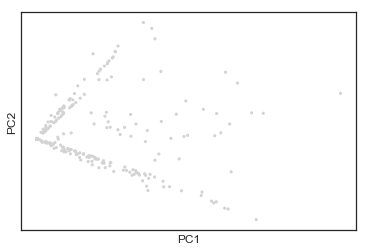

In [21]:
sc.pl.pca(adata)

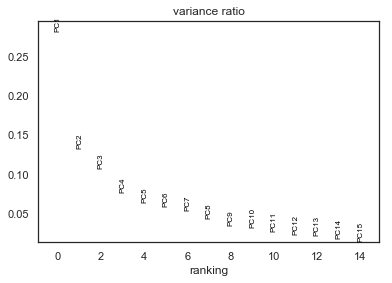

In [22]:
sc.pl.pca_variance_ratio(adata)

In [27]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=9)

In [28]:
sc.tl.umap(adata)

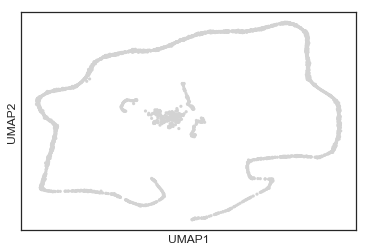

In [29]:
sc.pl.umap(adata)

TypeError: object of type 'numpy.int64' has no len()

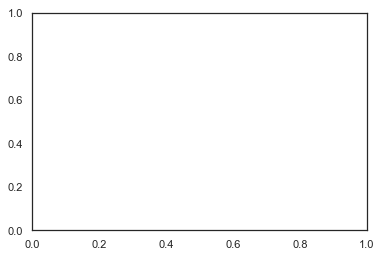

In [30]:
sc.pl.umap(adata, color=['DAPI'])